In [1]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
conn = mysql.connector.connect(
    host="localhost",  # Replace 'your_host' with your MySQL host
    user="root",  # Replace 'your_username' with your MySQL username
    password="prashant02",  # Replace 'your_password' with your MySQL password
    database="newwheels"  # Replace 'your_database' with your MySQL database name
)

# Define a color palette
#colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
# colors = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999']
# colors = [ '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33', '#a65628', '#f781bf', '#999999',
#           '#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', 
#           '#6a3d9a', '#ffff99', '#b15928', '#fbb4ae', '#b3cde3', '#ccebc5', '#decbe4', '#fed9a6', '#ffffcc', 
#           '#e5d8bd', '#fddaec', '#f2f2f2', '#ffeda0', '#feb24c', '#fd8d3c', '#fc4e2a', '#e31a1c', '#bd0026', 
#           '#800026', '#ffffb3', '#8dd3c7', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', 
#           '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f', '#7fc97f', '#fdc086', '#ffff99', '#386cb0', '#f0027f', 
#           '#bf5b17', '#666666']
colors = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#fdbf6f', '#ff7f00', '#cab2d6']
# colors = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02', '#a6761d', '#666666']
# colors = ['#7fc97f', '#beaed4', '#fdc086', '#ffff99', '#386cb0', '#f0027f', '#bf5b17', '#666666']
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
#palette="winter

In [3]:
sql_query = '''
SELECT state, COUNT(customer_id) AS customer_count
FROM newwheels.customer_t
GROUP BY state
ORDER BY customer_count DESC;
'''

df = pd.read_sql_query(sql_query, conn)


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1295828713.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


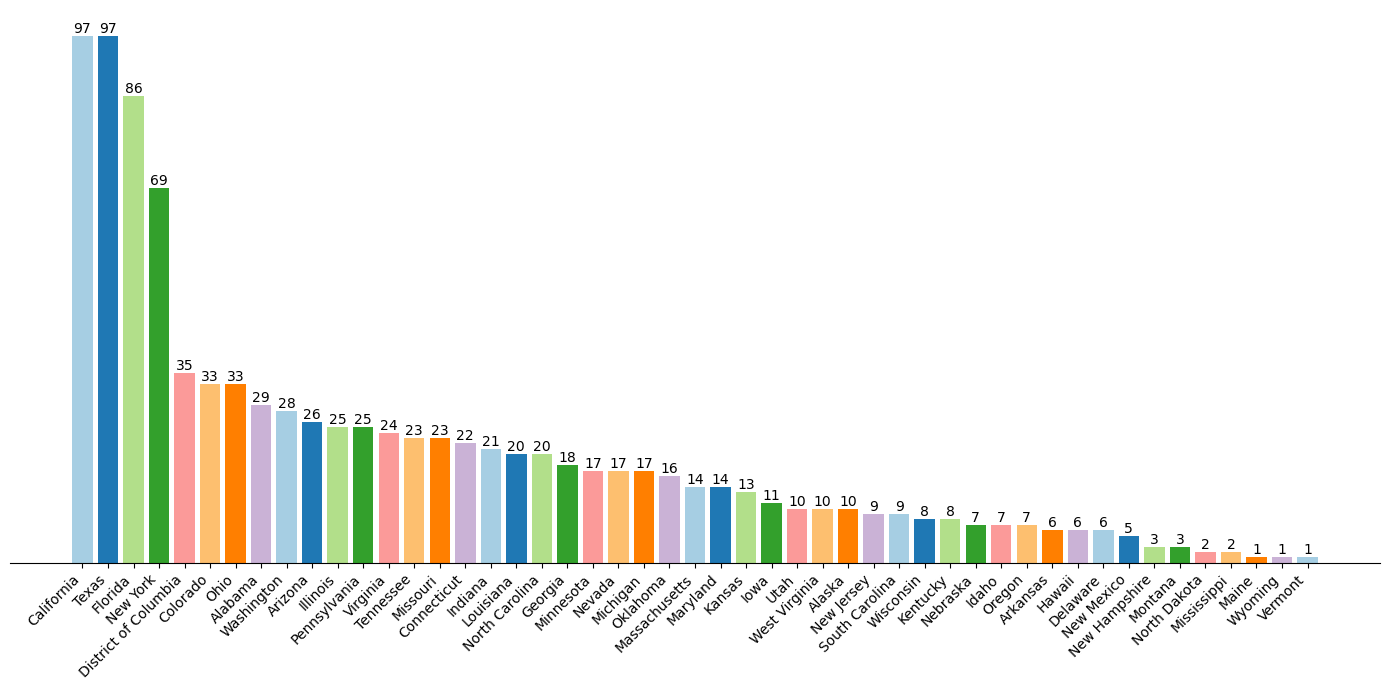

In [4]:
# Plot the customer distribution across states

# fig = plt.figure(figsize=(14, 7))
# ax = fig.add_subplot(111)

# # Plot the bar chart
# bars = ax.bar(df['state'], df['customer_count'], color=colors)

# # Remove border connecting x and y axes
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.bar(df['state'], df['customer_count'], color=colors)
# # plt.ylabel('State')
# # plt.xlabel('Customer Count')
# #plt.title('Customer Distribution Across States')
# plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()
# fig.savefig('Output/customer_distribution1.png')


fig = plt.figure(figsize=(14, 7))
ax = fig.add_subplot(111)

# Plot the bar chart
bars = ax.bar(df['state'], df['customer_count'], color=colors)

# Add values inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Remove y-axis and y ticks
ax.spines['left'].set_visible(False)
plt.yticks([])

# Remove border connecting x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot
fig.savefig('Output/customer_distribution1.png', transparent=True)


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1496558555.py:8: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


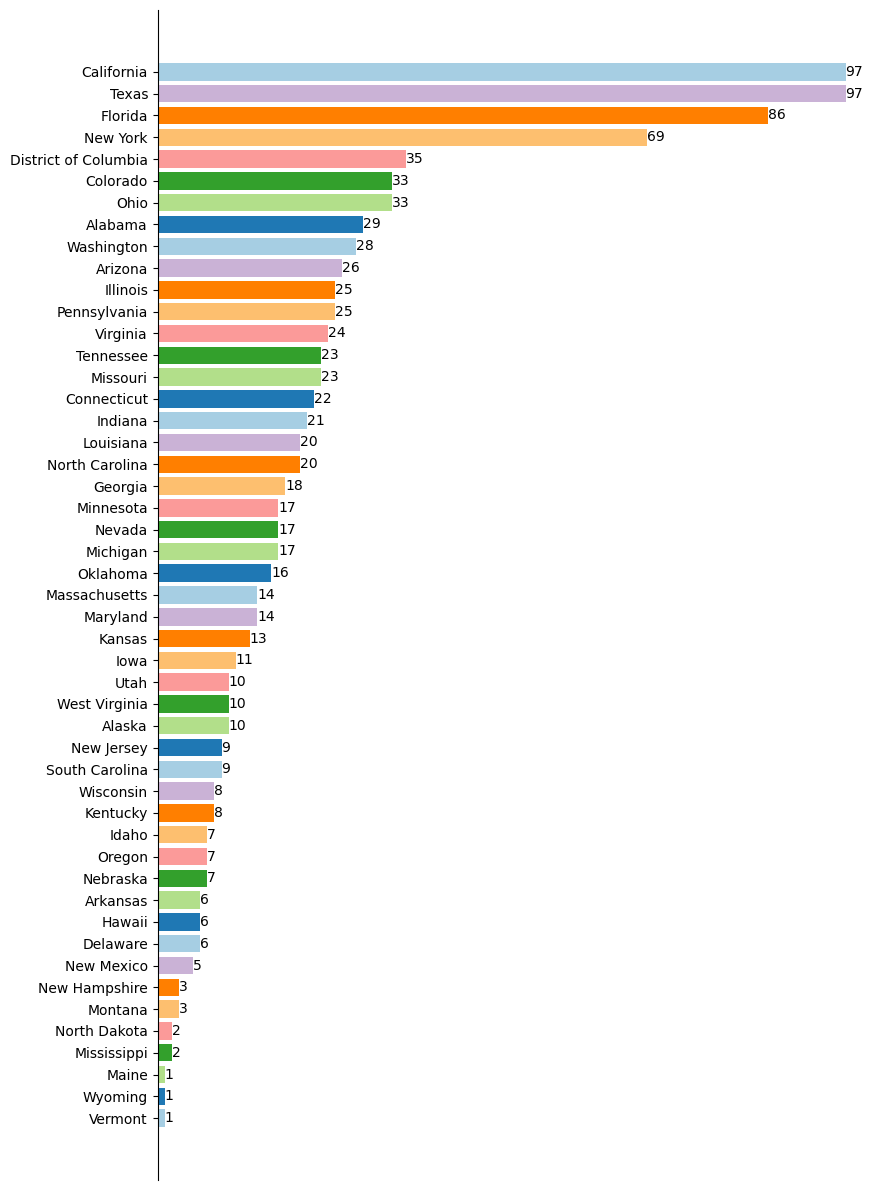

In [5]:
sql_query = '''
SELECT state, COUNT(customer_id) AS customer_count
FROM newwheels.customer_t
GROUP BY state
ORDER BY customer_count DESC;
'''

df = pd.read_sql_query(sql_query, conn)

df = df.sort_values(by='customer_count', ascending=True)

fig = plt.figure(figsize=(9, 12))
ax = fig.add_subplot(111)

# Plot the horizontal bar chart
bars = ax.barh(df['state'], df['customer_count'], color=colors)

# Add counts inside the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center')

# Remove x-axis and x ticks
ax.spines['bottom'].set_visible(False)
plt.xticks([])

# Remove border connecting y and x axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add labels and title
# plt.xlabel('Customer Count')
# plt.ylabel('State')
# plt.title('Customer Distribution Across States')

plt.tight_layout()  # Adjust layout to prevent clipping of labels

plt.show()
fig.savefig('Output/customer_distribution_vertical.png', transparent=True)


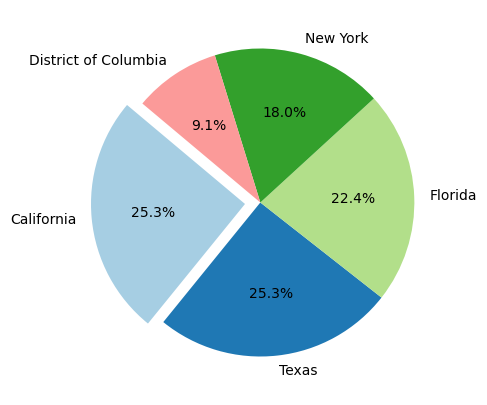

In [6]:
# plt.figure(figsize=(8, 8))
# plt.pie(df['customer_count'], labels=df['state'], colors=colors, autopct='%1.1f%%', startangle=140)
# plt.title('Customer Distribution Across States')
# plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
# plt.tight_layout()
# plt.show()

df_sorted = df.sort_values(by='customer_count', ascending=False)

# Select only the top 10 states
df_top_10 = df_sorted.head(5)



# Define the explode values to pull out slices
#explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Pull out the first slice (10%) 
explode = (0.1, 0, 0, 0, 0)
# Plot the customer distribution across top 10 states using a pie chart with exploded slice
fig1 =plt.figure(figsize=(5, 5))
plt.pie(df_top_10['customer_count'], labels=df_top_10['state'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
#plt.title('Top 5 states with maximum customers')
fig1.savefig('Output/customer_distribution_Pie.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\2754571323.py:29: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfrating = pd.read_sql_query(sql_query, conn)


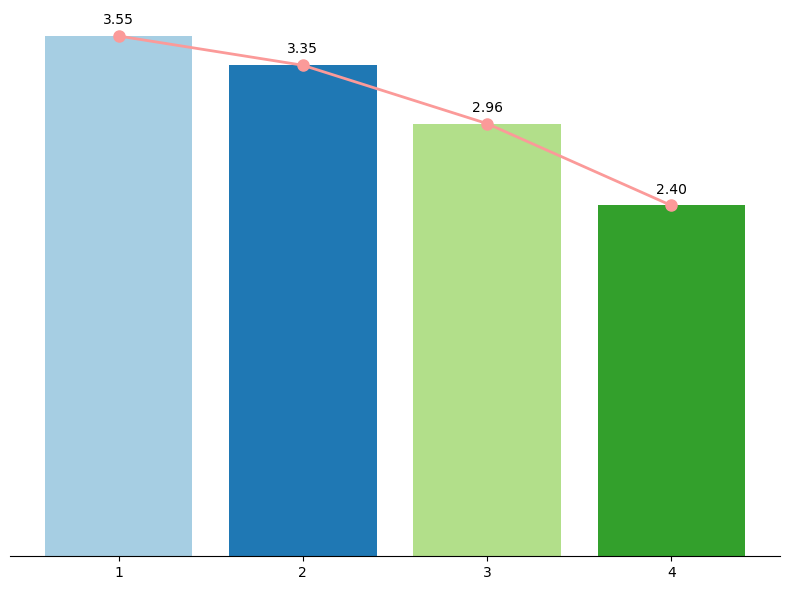

In [7]:
sql_query = '''
WITH RatingNumbers AS (
    SELECT
        quarter_number,
        CASE
            WHEN customer_feedback = 'Very Bad' THEN 1
            WHEN customer_feedback = 'Bad' THEN 2
            WHEN customer_feedback = 'Okay' THEN 3
            WHEN customer_feedback = 'Good' THEN 4
            WHEN customer_feedback = 'Very Good' THEN 5
            ELSE NULL  -- Handling any other values, if present
        END AS rating_number
    FROM
        order_t
    WHERE
        customer_feedback IN ('Very Bad', 'Bad', 'Okay', 'Good', 'Very Good')
)

SELECT
    quarter_number,
    AVG(rating_number) AS average_rating
FROM
    RatingNumbers
GROUP BY
    quarter_number
ORDER BY
    quarter_number;
'''
dfrating = pd.read_sql_query(sql_query, conn)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the bar chart
bars = ax.bar(dfrating['quarter_number'], dfrating['average_rating'], color=colors)

# Plot the trend line
ax.plot(dfrating['quarter_number'], dfrating['average_rating'], marker='o', color=colors[4], linewidth=2, markersize=8, label='Trend Line')

# Add values on top of the bars at the center
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height+0.06, f'{height:.2f}', ha='center', va='bottom')

# Set labels and ticks
# ax.set_xlabel('Quarter#')
# ax.set_ylabel('Average Rating')
ax.set_xticks(range(1, 5))

# Hide y-axis and y ticks
ax.spines['left'].set_visible(False)
plt.yticks([])

# Hide borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# Save the plot
fig.savefig('Output/avgRating.png', transparent=True)

# dfrating = pd.read_sql_query(sql_query, conn)
# fig, ax = plt.subplots(figsize=(8, 6))

# # Plot the bar chart
# ax.bar(dfrating['quarter_number'], dfrating['average_rating'], color=colors)

# # Plot the trend line
# ax.plot(dfrating['quarter_number'], dfrating['average_rating'], marker='o', color=colors[4], linewidth=2, markersize=8, label='Trend Line')

# # Set labels and ticks
# # ax.set_xlabel('Quarter#')
# # ax.set_ylabel('Average Rating')
# ax.set_xticks(range(1, 5))

# # Hide borders
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)


# # Show the plot
# plt.tight_layout()
# plt.show()

# # Save the plot
# fig.savefig('Output/avgRating.png')

In [8]:
sql_query = '''
WITH FeedbackCounts AS (
    SELECT quarter_number,
           COUNT(*) AS total_feedback,
           SUM(CASE WHEN customer_feedback = 'Very Bad' THEN 1 ELSE 0 END) AS very_bad_count,
           SUM(CASE WHEN customer_feedback = 'Bad' THEN 1 ELSE 0 END) AS bad_count,
           SUM(CASE WHEN customer_feedback = 'Okay' THEN 1 ELSE 0 END) AS okay_count,
           SUM(CASE WHEN customer_feedback = 'Good' THEN 1 ELSE 0 END) AS good_count,
           SUM(CASE WHEN customer_feedback = 'Very Good' THEN 1 ELSE 0 END) AS very_good_count
    FROM order_t
    GROUP BY quarter_number
)

SELECT
    quarter_number,
    total_feedback,
    very_bad_count,
    bad_count,
    okay_count,
    good_count,
    very_good_count,
    ROUND((very_bad_count / total_feedback) * 100, 2) AS very_bad_percentage,
    ROUND((bad_count / total_feedback) * 100, 2) AS bad_percentage,
    ROUND((okay_count / total_feedback) * 100, 2) AS okay_percentage,
    ROUND((good_count / total_feedback) * 100, 2) AS good_percentage,
    ROUND((very_good_count / total_feedback) * 100, 2) AS very_good_percentage
FROM FeedbackCounts
ORDER BY quarter_number;
'''

feedback_data = pd.read_sql_query(sql_query, conn)


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1854148240.py:31: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  feedback_data = pd.read_sql_query(sql_query, conn)


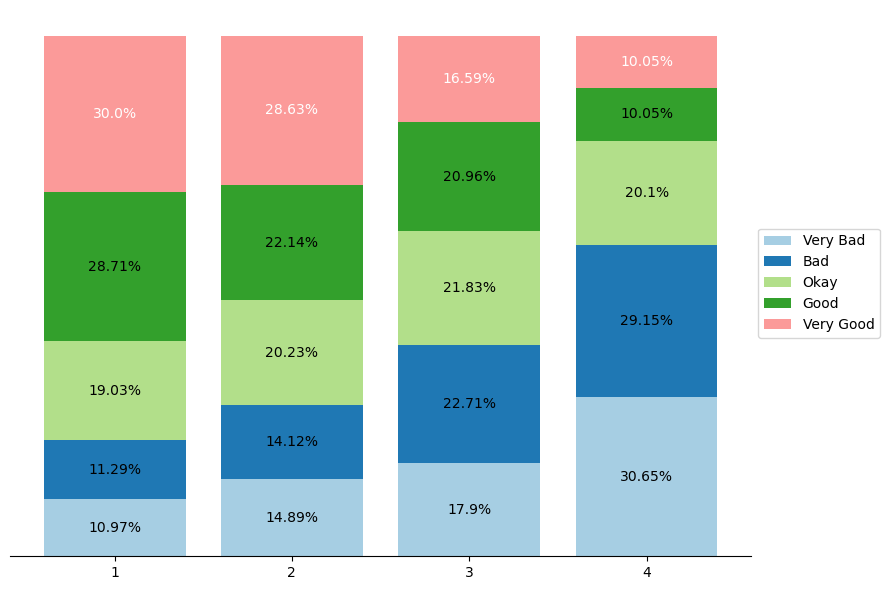

In [9]:
feedback_data['very_bad_cumulative'] = feedback_data['very_bad_percentage']
feedback_data['bad_cumulative'] = feedback_data['bad_percentage'] + feedback_data['very_bad_percentage']
feedback_data['okay_cumulative'] = feedback_data['okay_percentage'] + feedback_data['bad_percentage'] + feedback_data['very_bad_percentage']
feedback_data['good_cumulative'] = feedback_data['good_percentage'] + feedback_data['okay_percentage'] + feedback_data['bad_percentage'] + feedback_data['very_bad_percentage']
feedback_data['very_good_cumulative'] = feedback_data['very_good_percentage'] + feedback_data['good_percentage'] + feedback_data['okay_percentage'] + feedback_data['bad_percentage'] + feedback_data['very_bad_percentage']

w=0.8
# Plotting the 100% stacked bar chart
figfeedback = plt.figure(figsize=(9, 6))

# Plot each segment of the bar chart separately and add percentage annotations inside each bar
for i, row in feedback_data.iterrows():
    plt.bar(row['quarter_number'], row['very_bad_percentage'], color=colors[0], width=w)
    plt.text(row['quarter_number'], row['very_bad_cumulative'] - row['very_bad_percentage'] / 2, f'{row["very_bad_percentage"]}%', ha='center', va='center', color='black')
    
    plt.bar(row['quarter_number'], row['bad_percentage'], bottom=row['very_bad_percentage'], color=colors[1], width=w)
    plt.text(row['quarter_number'], row['bad_cumulative'] - row['bad_percentage'] / 2, f'{row["bad_percentage"]}%', ha='center', va='center', color='black')
    
    plt.bar(row['quarter_number'], row['okay_percentage'], bottom=row['bad_cumulative'], color=colors[2], width=w)
    plt.text(row['quarter_number'], row['okay_cumulative'] - row['okay_percentage'] / 2, f'{row["okay_percentage"]}%', ha='center', va='center', color='black')
    
    plt.bar(row['quarter_number'], row['good_percentage'], bottom=row['okay_cumulative'], color=colors[3], width=w)
    plt.text(row['quarter_number'], row['good_cumulative'] - row['good_percentage'] / 2, f'{row["good_percentage"]}%', ha='center', va='center', color='black')
    
    plt.bar(row['quarter_number'], row['very_good_percentage'], bottom=row['good_cumulative'], color=colors[4], width=w)
    plt.text(row['quarter_number'], row['very_good_cumulative'] - row['very_good_percentage'] / 2, f'{row["very_good_percentage"]}%', ha='center', va='center', color='white')

# Add legend
plt.legend(['Very Bad', 'Bad', 'Okay', 'Good', 'Very Good'], loc='center left', bbox_to_anchor=(1, 0.5))

# plt.xlabel('Quarter Number')
# plt.ylabel('Average rating')
#plt.title('Percentage Split of Customer Feedback by Quarter')
plt.xticks(feedback_data['quarter_number'])
plt.gca().yaxis.set_visible(False) 
plt.gca().spines['left'].set_color('none')  # Hide left spine
plt.gca().spines['right'].set_color('none')  # Hide right spine
plt.gca().spines['top'].set_color('none')  # Hide top spine
plt.gca().spines['bottom'].set_color('black')  # Set bottom spine color to black

plt.tight_layout()
plt.show()
figfeedback.savefig('Output/AvgRatingTrend.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\3130050434.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_top5Makers = pd.read_sql_query(sql_query, conn)


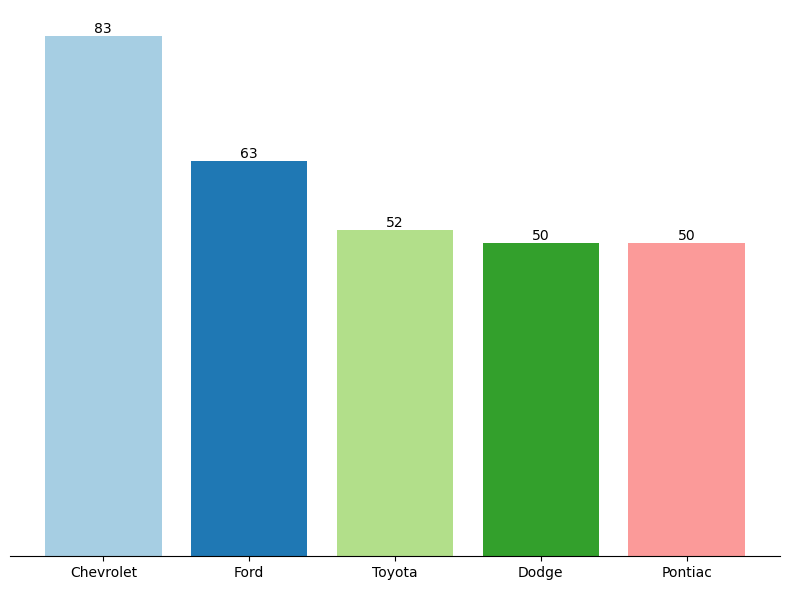

In [10]:
sql_query = '''SELECT
    p.vehicle_maker as vehicle_maker,
    COUNT(DISTINCT o.customer_id) AS customer_count
FROM
    order_t o
JOIN
    customer_t c ON o.customer_id = c.customer_id
JOIN
    product_t p ON o.product_id = p.product_id
GROUP BY
    p.vehicle_maker
ORDER BY
    customer_count DESC
LIMIT 5;'''
df_top5Makers = pd.read_sql_query(sql_query, conn)
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

# Plot the bar chart
bars = ax.bar(df_top5Makers['vehicle_maker'], df_top5Makers['customer_count'], color=colors)

# Add values on top of the bars at the center
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')

# Remove y-axis and y ticks
ax.spines['left'].set_visible(False)
plt.yticks([])

# Remove border connecting x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()

# Save the plot
fig.savefig('Output/TopVehicleMakers.png', transparent=True)

# df_top5Makers = pd.read_sql_query(sql_query, conn)

# fig = plt.figure(figsize=(8, 6))
# ax = fig.add_subplot(111)

# # Plot the bar chart
# bars = ax.bar(df_top5Makers['vehicle_maker'], df_top5Makers['customer_count'], color=colors)

# # Remove border connecting x and y axes
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)
# plt.bar(df_top5Makers['vehicle_maker'], df_top5Makers['customer_count'], color=colors)
# # plt.ylabel('vehicle_maker')
# # plt.xlabel('Customer Count')
# #plt.title('Customer Distribution Across States')
# # plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()
# fig.savefig('Output/TopVehicleMakers.png')


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\16540139.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_StaetWiseMake = pd.read_sql_query(sql_query, conn)


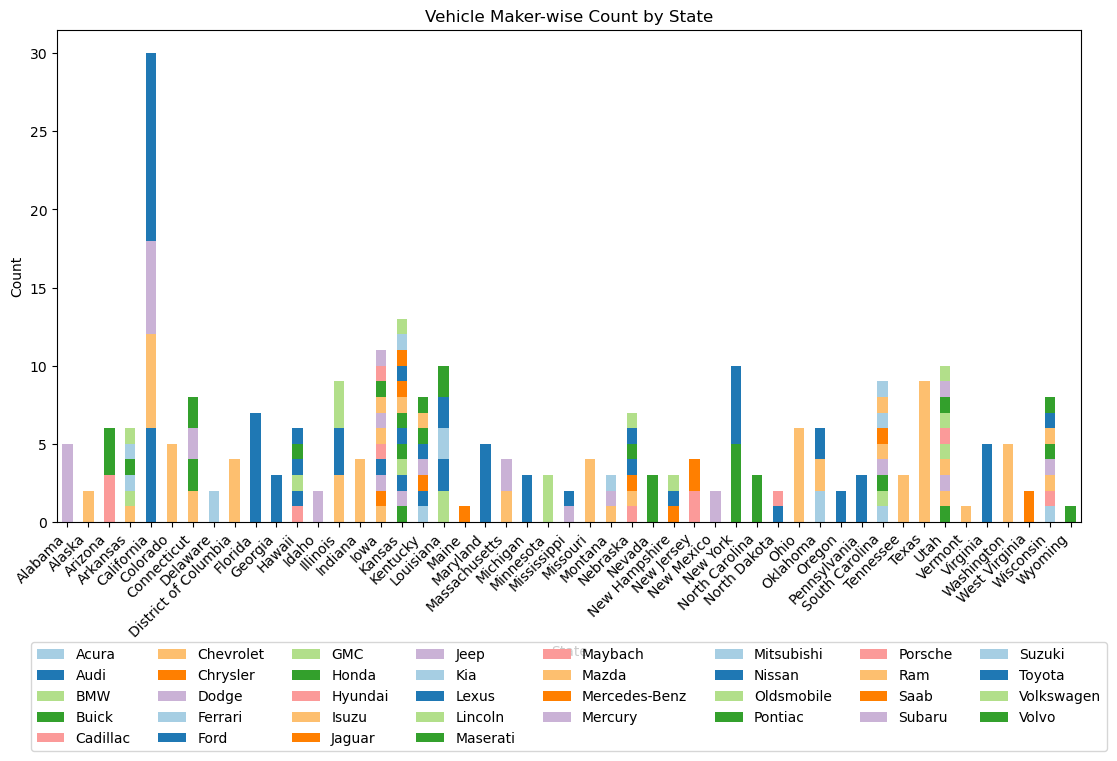

In [11]:
sql_query = '''WITH StateVehicleCounts AS (
    SELECT
        state,
        vehicle_maker,
        COUNT(DISTINCT o.customer_id) AS customer_count,
        RANK() OVER (PARTITION BY state ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS rank1
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    JOIN
        product_t p ON o.product_id = p.product_id
    GROUP BY
        state, vehicle_maker
),
StateCustomerCounts AS (
    SELECT
        state,
        RANK() OVER (ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS state_rank
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    GROUP BY
        state
)
SELECT
    svc.state,
    svc.vehicle_maker AS vehicle_maker,
    svc.customer_count as customer_count,
    svc.customer_count as state_cust_count
FROM
    StateVehicleCounts svc
JOIN
    StateCustomerCounts scc ON svc.state = scc.state
WHERE
    svc.rank1 = 1
ORDER BY
    scc.state_rank, svc.customer_count DESC;'''

df_StaetWiseMake = pd.read_sql_query(sql_query, conn)
pivot_df = df_StaetWiseMake.pivot(index='state', columns='vehicle_maker', values='customer_count').fillna(0)

# Plotting the stacked bar chart
figStateWiseMake, ax = plt.subplots(figsize=(12, 8))
pivot_df.plot(kind='bar', stacked=True, ax=ax, color = colors)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Vehicle Maker-wise Count by State')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.legend(title='Vehicle Maker')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.23), ncol=8)
plt.tight_layout()
plt.show()
figStateWiseMake.savefig('Output/StateWiseTopMake.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\2982531848.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_StaetWiseMake = pd.read_sql_query(sql_query, conn)


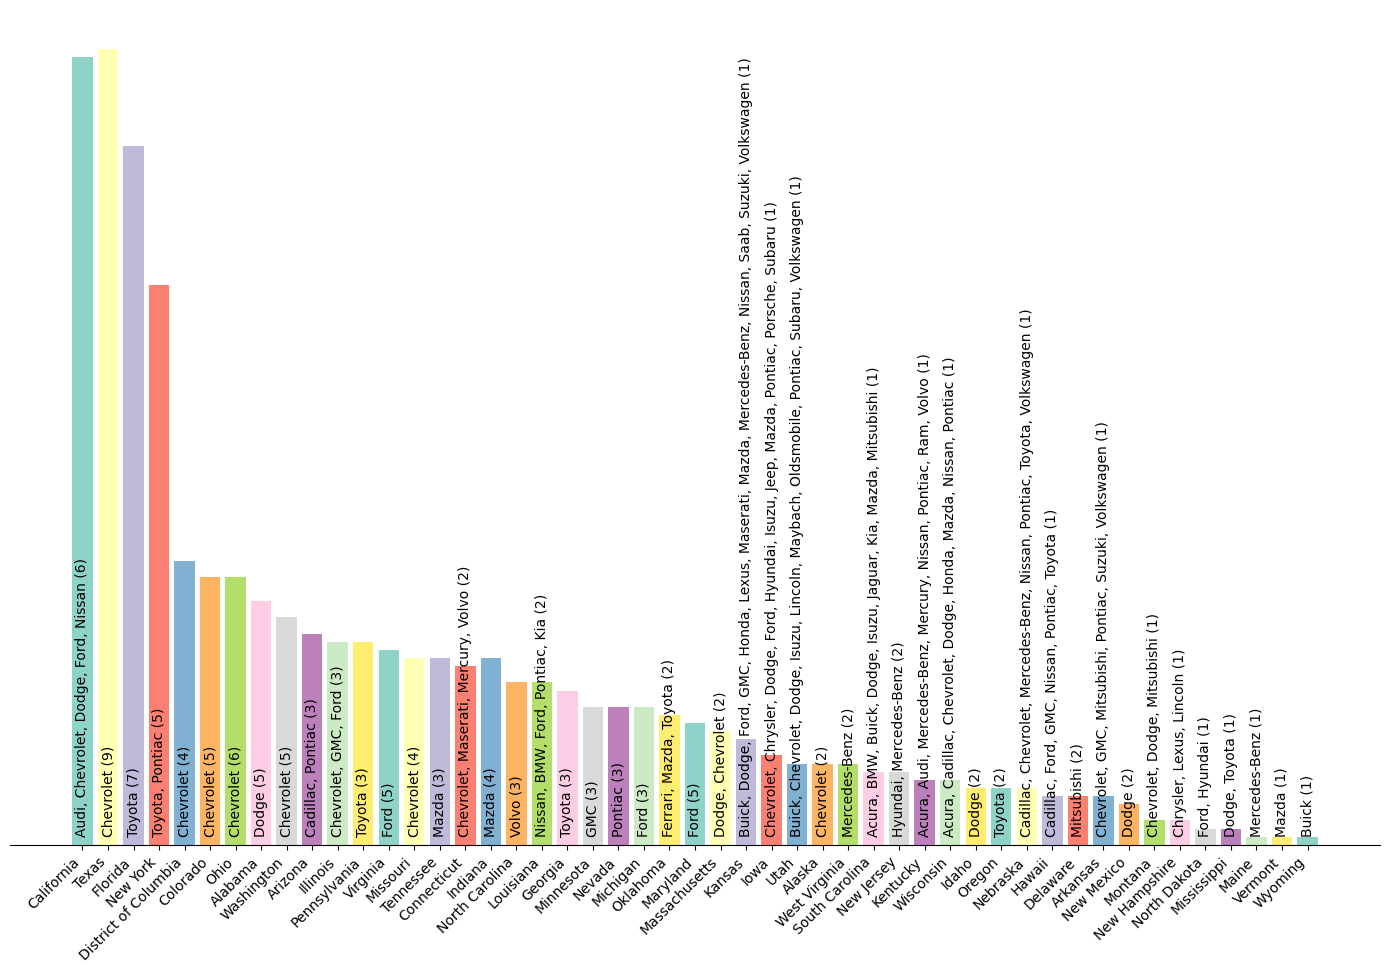

In [12]:
sql_query = '''WITH StateVehicleCounts AS (
    SELECT
        state,
        vehicle_maker,
        COUNT(DISTINCT o.customer_id) AS customer_count,
        RANK() OVER (PARTITION BY state ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS rank1
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    JOIN
        product_t p ON o.product_id = p.product_id
    GROUP BY
        state, vehicle_maker
),
StateCustomerCounts AS (
    SELECT
        state,
        count(o.customer_id) as state_customer_count,
        RANK() OVER (ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS state_rank
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    GROUP BY
        state
)
SELECT
    svc.state as state,
    CONCAT(GROUP_CONCAT(CONCAT(svc.vehicle_maker) SEPARATOR ', ')) AS vehicle_maker,
    round(avg(svc.customer_count)) as customer_count,
    round(avg(scc.state_customer_count)) as state_customer_count,
    scc.state_rank as state_rank
FROM
    StateVehicleCounts svc
JOIN
    StateCustomerCounts scc ON svc.state = scc.state
WHERE
    svc.rank1 = 1
GROUP BY
        svc.state
ORDER BY
    avg(scc.state_rank) ASC;'''

df_StaetWiseMake = pd.read_sql_query(sql_query, conn)

# df_StaetWiseMake = df_StaetWiseMake.sort_values(by='state_customer_count', ascending=False)


# figStateMakeCnt = plt.figure(figsize=(13, 10))
# bars = plt.bar(df_StaetWiseMake['state'], df_StaetWiseMake['state_customer_count'], color=plt.cm.Set3.colors)

# # Annotate each bar with the name of the preferred vehicle maker
# for bar, maker, count in zip(bars, df_StaetWiseMake['vehicle_maker'], df_StaetWiseMake['customer_count']):
#     # Calculate the position for the annotation
#     text_y =  1  # Fixed position slightly above the bar
#     plt.text(bar.get_x() + bar.get_width() / 2, text_y, f'{maker} ({int(count)})', va='bottom', ha='center', rotation=90)

# # plt.ylabel('Count')
# # plt.xlabel('State')
# plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
# plt.gca().spines['top'].set_visible(False)  # Hide top spine
# plt.gca().spines['right'].set_visible(False)  # Hide right spine
# plt.gca().spines['left'].set_visible(True)  # Show left spine
# plt.gca().spines['bottom'].set_visible(True)  # Show bottom spine
# plt.tick_params(axis='both', which='both', length=0)  # Hide tick marks
# plt.tight_layout()
# plt.show()
# figStateMakeCnt.savefig('Output/StateWiseTopMake1.png')

figStateMakeCnt = plt.figure(figsize=(14, 10))
bars = plt.bar(df_StaetWiseMake['state'], df_StaetWiseMake['state_customer_count'], color=plt.cm.Set3.colors)

# Annotate each bar with the name of the preferred vehicle maker
for bar, maker, count in zip(bars, df_StaetWiseMake['vehicle_maker'], df_StaetWiseMake['customer_count']):
    # Calculate the position for the annotation
    text_y =  1  # Fixed position slightly above the bar
    plt.text(bar.get_x() + bar.get_width() / 2, text_y, f'{maker} ({int(count)})', va='bottom', ha='center', rotation=90)

# Remove y-axis and y ticks
plt.tick_params(axis='y', which='both', length=0, labelleft=False) 
plt.gca().spines['left'].set_visible(False)  # Hide left spine

# Hide top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
figStateMakeCnt.savefig('Output/StateWiseTopMake1.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\2949109456.py:45: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_StaetWiseMake = pd.read_sql_query(sql_query, conn)


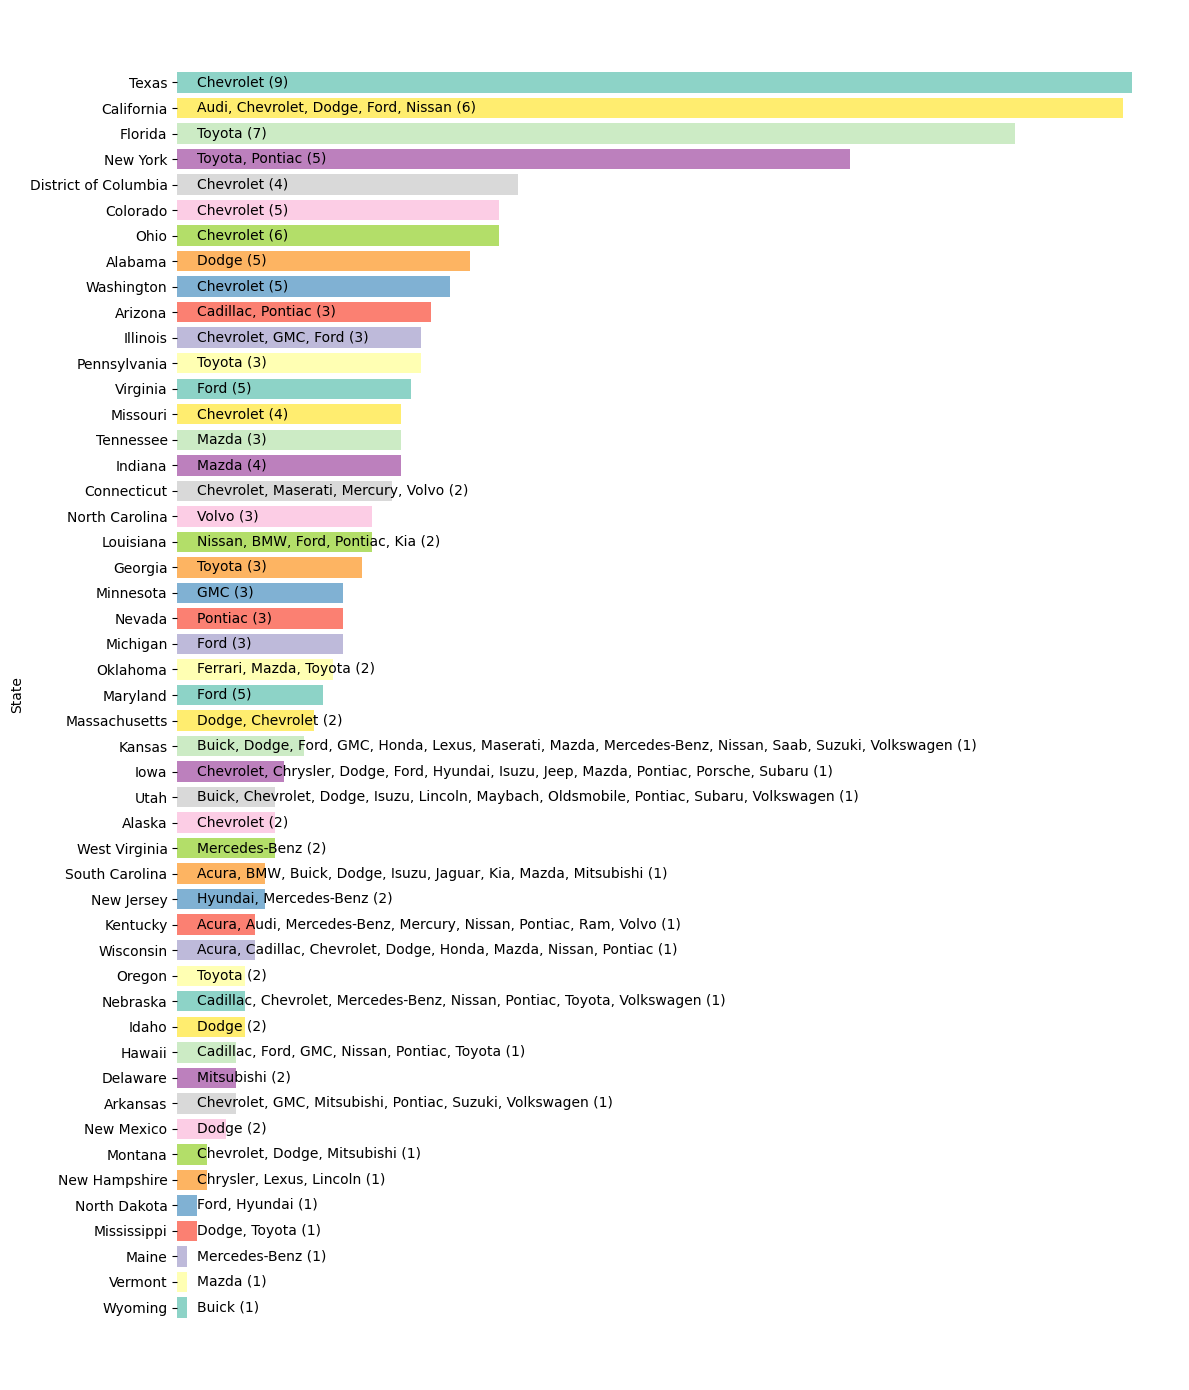

In [13]:
sql_query = '''WITH StateVehicleCounts AS (
    SELECT
        state,
        vehicle_maker,
        COUNT(DISTINCT o.customer_id) AS customer_count,
        RANK() OVER (PARTITION BY state ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS rank1
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    JOIN
        product_t p ON o.product_id = p.product_id
    GROUP BY
        state, vehicle_maker
),
StateCustomerCounts AS (
    SELECT
        state,
        count(o.customer_id) as state_customer_count,
        RANK() OVER (ORDER BY COUNT(DISTINCT o.customer_id) DESC) AS state_rank
    FROM
        order_t o
    JOIN
        customer_t c ON o.customer_id = c.customer_id
    GROUP BY
        state
)
SELECT
    svc.state as state,
    CONCAT(GROUP_CONCAT(CONCAT(svc.vehicle_maker) SEPARATOR ', ')) AS vehicle_maker,
    round(avg(svc.customer_count)) as customer_count,
    round(avg(scc.state_customer_count)) as state_customer_count,
    scc.state_rank as state_rank
FROM
    StateVehicleCounts svc
JOIN
    StateCustomerCounts scc ON svc.state = scc.state
WHERE
    svc.rank1 = 1
GROUP BY
        svc.state
ORDER BY
    avg(scc.state_rank) ASC;'''

df_StaetWiseMake = pd.read_sql_query(sql_query, conn)

df_StaetWiseMake = df_StaetWiseMake.sort_values(by='state_customer_count', ascending=True)


# Plotting the horizontal bar chart
figStateMakeCnt = plt.figure(figsize=(12, 14))
bars = plt.barh(df_StaetWiseMake['state'], df_StaetWiseMake['state_customer_count'], color=plt.cm.Set3.colors)

# Annotate each bar with the name of the preferred vehicle maker
for bar, maker, count in zip(bars, df_StaetWiseMake['vehicle_maker'], df_StaetWiseMake['customer_count']):
    # Calculate the position for the annotation
    text_x = 2  # Fixed position slightly to the right of the y-axis
    plt.text(text_x, bar.get_y() + bar.get_height()/2, f'{maker} ({int(count)})', va='center', ha='left')

plt.xlabel('Count')
plt.ylabel('State')
# plt.title('Most Preferred Vehicle Maker by State')
plt.gca().axes.get_xaxis().set_visible(False)  # Hide x-axis
plt.grid(axis='x', linestyle='')  # Hide grid lines
plt.box(False)  # Hide the box around the plot
plt.tight_layout()
plt.show()
figStateMakeCnt.savefig('Output/StateWiseTopMake.png', transparent=True)
# df_StaetWiseMake = df_StaetWiseMake.sort_values(by='state_customer_count', ascending=True)

# # Plotting the horizontal bar chart with adjusted figure size
# plt.figure(figsize=(14, 10))
# bars = plt.barh(df_StaetWiseMake['state'], df_StaetWiseMake['state_customer_count'], color='skyblue')

# # Annotate each bar with both the name of the preferred vehicle maker and its count
# for bar, maker, count in zip(bars, df_StaetWiseMake['vehicle_maker'], df_StaetWiseMake['state_customer_count']):
#     plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height()/2, f'{maker} ({count})', va='center')

# plt.xlabel('Count')
# plt.ylabel('State')
# plt.title('Most Preferred Vehicle Maker by State')
# plt.grid(axis='x')
# plt.tight_layout()
# plt.show()

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\2438909763.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_OrderTrend = pd.read_sql_query(sql_query, conn)


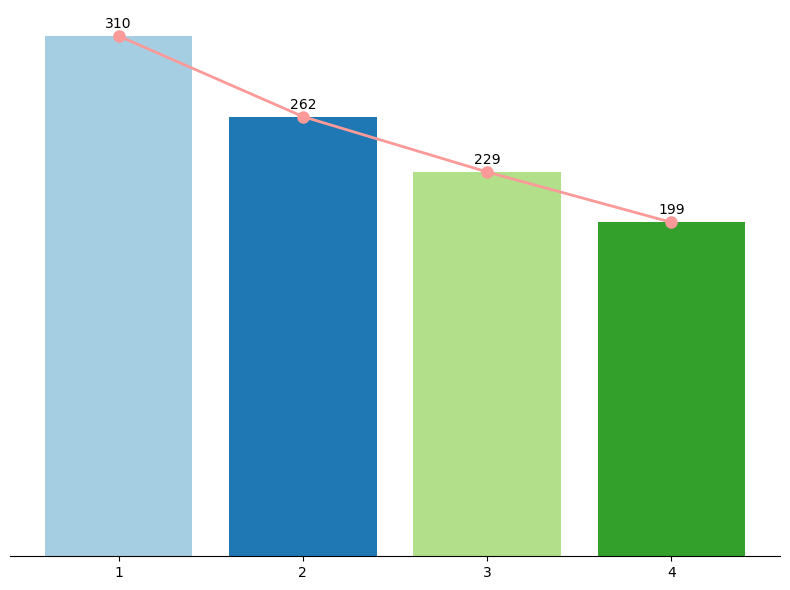

In [14]:
sql_query = '''
SELECT
    quarter_number,
    COUNT(order_id) AS num_orders
FROM
    order_t
GROUP BY
    quarter_number
ORDER BY
    quarter_number; '''
df_OrderTrend = pd.read_sql_query(sql_query, conn)
# figOrderTrend = plt.figure(figsize=(8,6))

# plt.bar(df_OrderTrend['quarter_number'], df_OrderTrend['num_orders'], color=colors)
# plt.plot(df_OrderTrend['quarter_number'], df_OrderTrend['num_orders'], marker='o', color=colors[4], linewidth=2, markersize=8, label='Trend Line')

# # plt.xlabel('Quarter#')
# # plt.ylabel('Orders')
# plt.xticks(range(1, 5))
# #plt.title('Customer Distribution Across States')
# #plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
# plt.tight_layout()  # Adjust layout to prevent clipping of labels
# plt.show()
# figOrderTrend.savefig('Output/OrderTrend.png')

figOrderTrend = plt.figure(figsize=(8,6))

# Plot the bar chart
bars = plt.bar(df_OrderTrend['quarter_number'], df_OrderTrend['num_orders'], color=colors)

# Plot the trend line
plt.plot(df_OrderTrend['quarter_number'], df_OrderTrend['num_orders'], marker='o', color=colors[4], linewidth=2, markersize=8, label='Trend Line')

# Add values on top of the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height+3, f'{int(height)}', ha='center', va='bottom')

# Remove y-axis and y ticks
plt.tick_params(axis='y', which='both', length=0, labelleft=False)  # Hide y ticks and values

# Hide borders
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)

plt.xticks(range(1, 5))
plt.gca().spines['bottom'].set_visible(True)  # Show bottom spine

plt.tight_layout()
plt.show()
figOrderTrend.savefig('Output/OrderTrend.png', transparent=True)



C:\Users\prash\AppData\Local\Temp\ipykernel_3848\4010856672.py:25: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenueTrend = pd.read_sql_query(sql_query, conn)
posx and posy should be finite values
posx and posy should be finite values


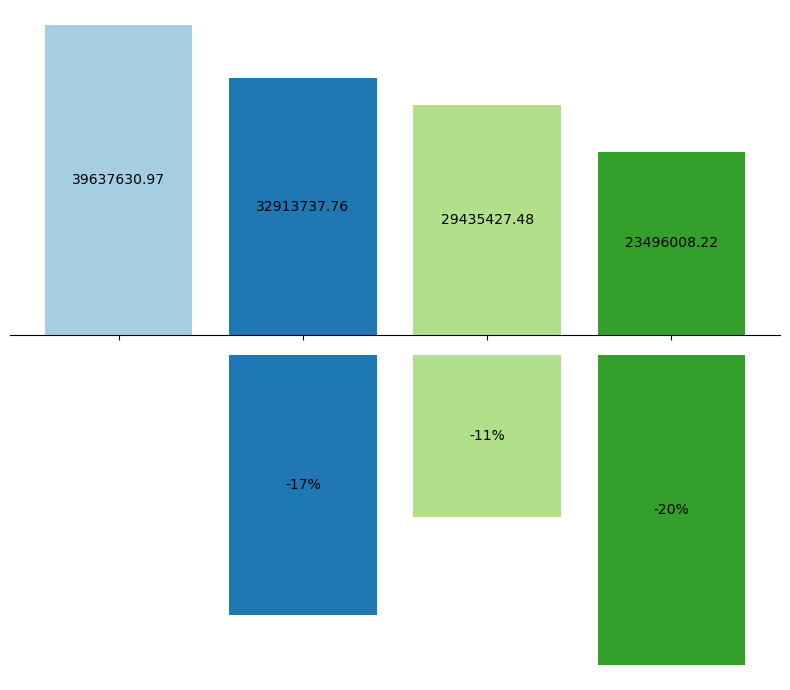

posx and posy should be finite values
posx and posy should be finite values


In [15]:
sql_query = '''
WITH QuarterlyRevenue AS (
    SELECT
        quarter_number,
        SUM(quantity * vehicle_price) AS revenue
    FROM
        order_t
    GROUP BY
        quarter_number
)

SELECT
    quarter_number,
    revenue,
    LAG(revenue) OVER (ORDER BY quarter_number) AS prev_quarter_revenue,
    CASE
        WHEN LAG(revenue) OVER (ORDER BY quarter_number) = 0 THEN NULL
        ELSE ((revenue - LAG(revenue) OVER (ORDER BY quarter_number)) / LAG(revenue) OVER (ORDER BY quarter_number)) * 100
    END AS qoq_percentage_change
FROM
    QuarterlyRevenue
ORDER BY
    quarter_number;      
      '''
df_revenueTrend = pd.read_sql_query(sql_query, conn)

figRevenueTrend, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 7), sharex=True)

# Plotting revenue values
bars1 = ax1.bar(df_revenueTrend['quarter_number'], df_revenueTrend['revenue'], color=colors)
ax1.set_ylabel('Revenue')

# Displaying values within bars for revenue
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height}', ha='center', va='center')

# Plotting QoQ percentage change values
bars2 = ax2.bar(df_revenueTrend['quarter_number'], df_revenueTrend['qoq_percentage_change'], color=colors)
ax2.set_ylabel('QoQ % Change')

# Displaying values within bars for QoQ percentage change
for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.0f}%', ha='center', va='center')

# Remove y-axis border for both subplots
for ax in [ax1, ax2]:
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.yaxis.set_visible(False)

# Remove top border of both subplots
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)

# Remove x-axis for the bottom plot (QoQ percentage change)
ax2.xaxis.set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.set_xticks(range(1, 5))
# Set labels and title
# ax1.set_xlabel('Quarter')
# plt.suptitle('Quarterly Revenue and QoQ Percentage Change')

# Set x-ticks for the top plot (revenue)
plt.xticks(df_revenueTrend['quarter_number'])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()
figRevenueTrend.savefig('Output/RevenueTrend.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1021342320.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenueOrdersTrend = pd.read_sql_query(sql_query, conn)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


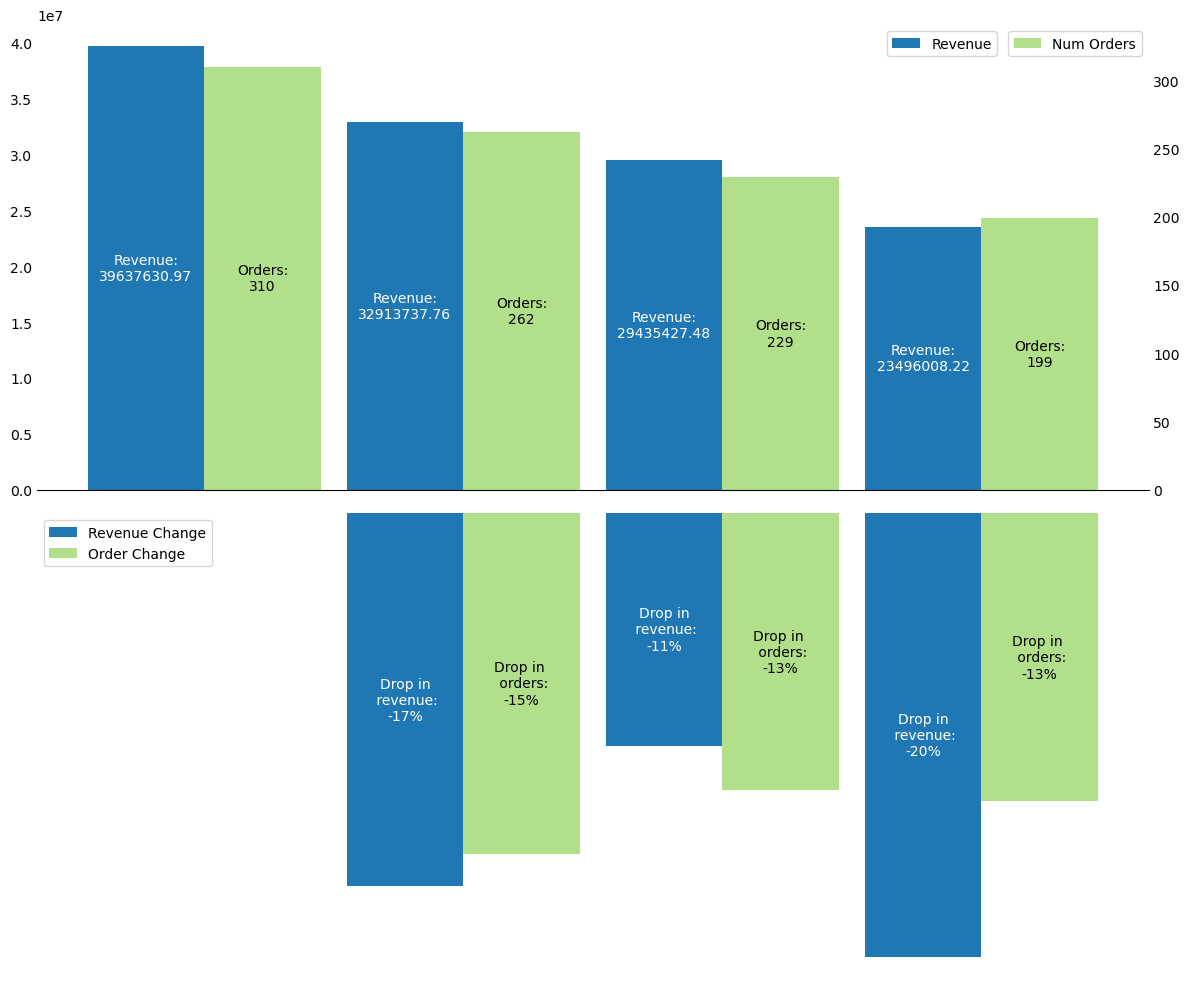

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [25]:
sql_query = '''
WITH QuarterlyData AS (
    SELECT
        quarter_number,
        SUM(quantity * vehicle_price) AS revenue,
        COUNT(order_id) AS num_orders
    FROM
        order_t
    GROUP BY
        quarter_number
)

SELECT
    QD.quarter_number,
    QD.revenue,    
    QD.num_orders,    
    CASE
        WHEN LAG(QD.revenue) OVER (ORDER BY QD.quarter_number) = 0 THEN NULL
        ELSE ((QD.revenue - LAG(QD.revenue) OVER (ORDER BY QD.quarter_number)) / LAG(QD.revenue) OVER (ORDER BY QD.quarter_number)) * 100
    END AS revenue_change_percentage,
    CASE
        WHEN LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number) = 0 THEN NULL
        ELSE ((QD.num_orders - LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number)) / LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number)) * 100
    END AS order_change_percentage
FROM
    QuarterlyData QD
ORDER BY
    QD.quarter_number;      
      '''
df_revenueOrdersTrend = pd.read_sql_query(sql_query, conn)
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# Create a figure and subplots (axes)
figOrderRevenue, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting revenue and orders on the top subplot
bar_width = 0.45
index = np.arange(len(df_revenueOrdersTrend))

bars1 = ax1.bar(index, df_revenueOrdersTrend['revenue'], bar_width, label='Revenue', color=colors[1])

# Creating a secondary y-axis for the top subplot
ax1_2 = ax1.twinx()
bars2 = ax1_2.bar(index + bar_width, df_revenueOrdersTrend['num_orders'], bar_width, label='Num Orders', color=colors[2])
# ax1_2.set_ylabel('Orders', color='dark green')
ax1_2.tick_params(axis='y', labelcolor='black')
ax1_2.set_ylim([0, df_revenueOrdersTrend['num_orders'].max() * 1.1])  # Adjust y-axis limit
ax1_2.spines['top'].set_visible(False)
ax1_2.spines['right'].set_visible(False)
ax1_2.spines['left'].set_visible(False)
# ax1_2.spines['bottom'].set_visible(False)
ax1_2.tick_params(axis='both', which='both', length=0)
# ax1_2.get_yaxis().set_visible(False)  # Hide the y-axis


# Plotting QoQ percentage changes on the bottom subplot
bars3 = ax2.bar(index, df_revenueOrdersTrend['revenue_change_percentage'], bar_width, label='Revenue Change', color=colors[1])
bars4 = ax2.bar(index + bar_width, df_revenueOrdersTrend['order_change_percentage'], bar_width, label='Order Change', color=colors[2])

# Hide borders, x and y axes for both subplots
for ax in [ax1, ax2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.set_visible(False)

# Annotate each bar with label and value on the top subplot
for bar, label, value in zip(bars1, ['revenue'] * len(bars1), df_revenueOrdersTrend['revenue']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, height / 2, f'{label.capitalize()}:\n{value}', 
             ha='center', va='center', color='white', fontsize=10)

for bar, label, value in zip(bars2, ['num_orders'] * len(bars2), df_revenueOrdersTrend['num_orders']):
    height = bar.get_height()
    ax1_2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'Orders:\n{value}', 
             ha='center', va='center', color='black', fontsize=10)

# Annotate each bar with label and value on the bottom subplot
for bar, label, value in zip(bars3, ['revenue_change_percentage'] * len(bars3), df_revenueOrdersTrend['revenue_change_percentage']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'Drop in\n revenue:\n{value:.0f}%', 
             ha='center', va='center', color='white', fontsize=10)

for bar, label, value in zip(bars4, ['order_change_percentage'] * len(bars4), df_revenueOrdersTrend['order_change_percentage']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'Drop in \n orders:\n{value:.0f}%', 
             ha='center', va='center', color='black', fontsize=10)


# Combine legends for both subplots
ax1.legend(bbox_to_anchor=(0.87, 1))
ax1_2.legend()
ax2.legend(loc='upper left')

# legend1 = ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1))
# # legend2 = ax1_2.legend(loc='upper left', bbox_to_anchor=(1.1, 0.9))
# # legend3 = ax2.legend(loc='upper left', bbox_to_anchor=(1, 1))

ax2.yaxis.set_visible(False)
# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
figOrderRevenue.savefig('Output/OrderRevenueTrend.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\2200286711.py:30: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_revenueOrdersTrend = pd.read_sql_query(sql_query, conn)
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


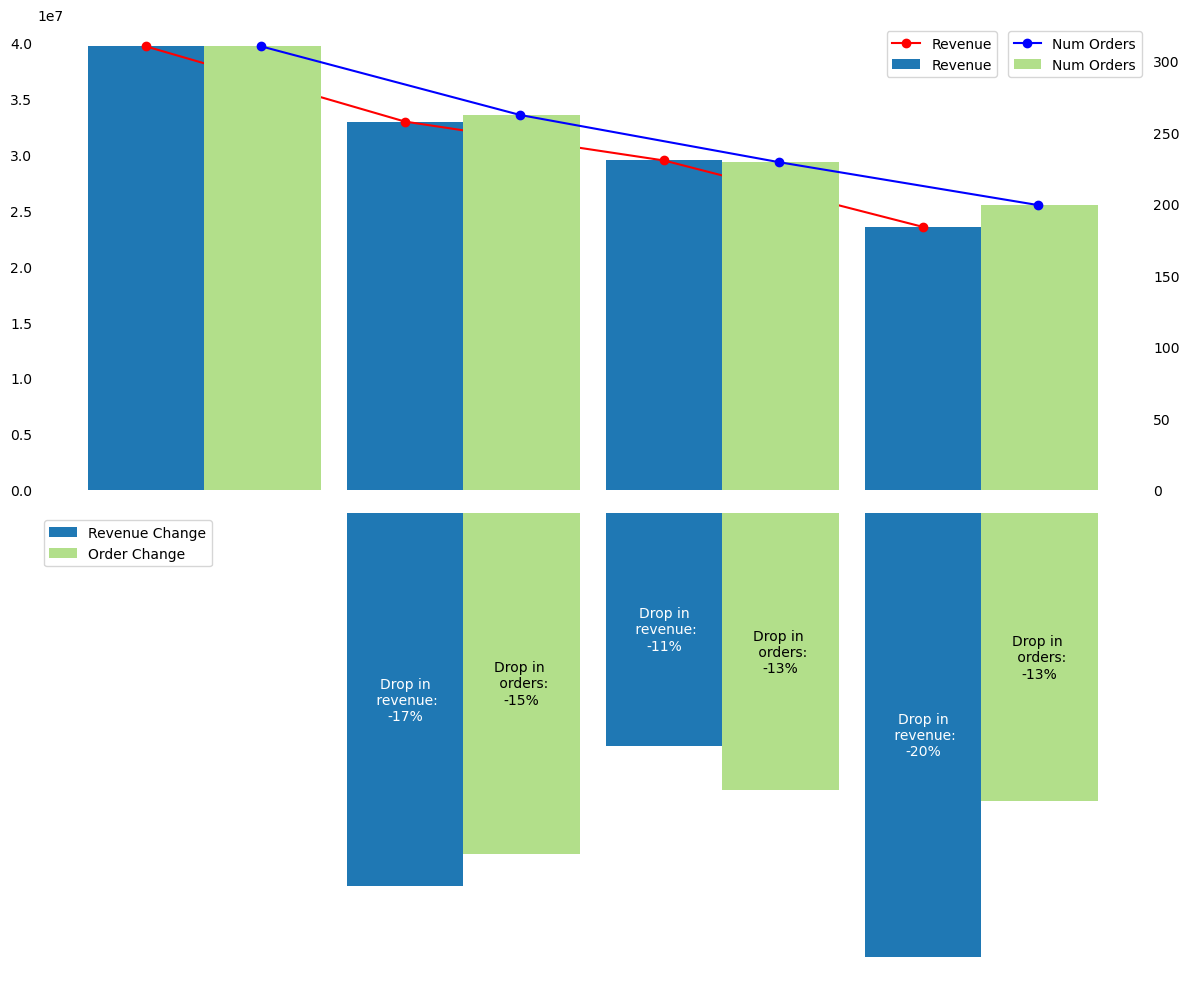

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


In [35]:
sql_query = '''
WITH QuarterlyData AS (
    SELECT
        quarter_number,
        SUM(quantity * vehicle_price) AS revenue,
        COUNT(order_id) AS num_orders
    FROM
        order_t
    GROUP BY
        quarter_number
)

SELECT
    QD.quarter_number,
    QD.revenue,    
    QD.num_orders,    
    CASE
        WHEN LAG(QD.revenue) OVER (ORDER BY QD.quarter_number) = 0 THEN NULL
        ELSE ((QD.revenue - LAG(QD.revenue) OVER (ORDER BY QD.quarter_number)) / LAG(QD.revenue) OVER (ORDER BY QD.quarter_number)) * 100
    END AS revenue_change_percentage,
    CASE
        WHEN LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number) = 0 THEN NULL
        ELSE ((QD.num_orders - LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number)) / LAG(QD.num_orders) OVER (ORDER BY QD.quarter_number)) * 100
    END AS order_change_percentage
FROM
    QuarterlyData QD
ORDER BY
    QD.quarter_number;      
      '''
df_revenueOrdersTrend = pd.read_sql_query(sql_query, conn)
quarters = ['Q1', 'Q2', 'Q3', 'Q4']

# Create a figure and subplots (axes)
figOrderRevenue, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting revenue and orders on the top subplot
bar_width = 0.45
index = np.arange(len(df_revenueOrdersTrend))

# Bar plots for revenue and orders
bars1 = ax1.bar(index, df_revenueOrdersTrend['revenue'], bar_width, label='Revenue', color=colors[1])
ax1_2 = ax1.twinx()
bars2 = ax1_2.bar(index + bar_width, df_revenueOrdersTrend['num_orders'], bar_width, label='Num Orders', color=colors[2])

# Line plots for revenue and orders
ax1.plot(index, df_revenueOrdersTrend['revenue'], label='Revenue', color='red', marker='o')
ax1_2.plot(index + 0.22 + bar_width  / 2, df_revenueOrdersTrend['num_orders'], label='Num Orders', color='blue', marker='o')

# Plotting QoQ percentage changes on the bottom subplot
bars3 = ax2.bar(index, df_revenueOrdersTrend['revenue_change_percentage'], bar_width, label='Revenue Change', color=colors[1])
bars4 = ax2.bar(index + bar_width, df_revenueOrdersTrend['order_change_percentage'], bar_width, label='Order Change', color=colors[2])

# Hide borders, x and y axes for both subplots
for ax in [ax1, ax2, ax1_2]:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', which='both', length=0)
    ax.xaxis.set_visible(False)

# Annotate each bar with label and value on the bottom subplot
for bar, label, value in zip(bars3, ['revenue_change_percentage'] * len(bars3), df_revenueOrdersTrend['revenue_change_percentage']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'Drop in\n revenue:\n{value:.0f}%', 
             ha='center', va='center', color='white', fontsize=10)

for bar, label, value in zip(bars4, ['order_change_percentage'] * len(bars4), df_revenueOrdersTrend['order_change_percentage']):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, height / 2, f'Drop in \n orders:\n{value:.0f}%', 
             ha='center', va='center', color='black', fontsize=10)

# Combine legends for both subplots
ax1.legend(bbox_to_anchor=(0.87, 1))
ax1_2.legend()
ax2.legend(loc='upper left')

# Hide y-axis for the bottom subplot
ax2.yaxis.set_visible(False)

# Adjust layout
plt.tight_layout()

# Display the plot
plt.show()
figOrderRevenue.savefig('Output/OrderRevenueTrend.png', transparent=True)




C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1102269800.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_CcDiscount = pd.read_sql_query(sql_query, conn)


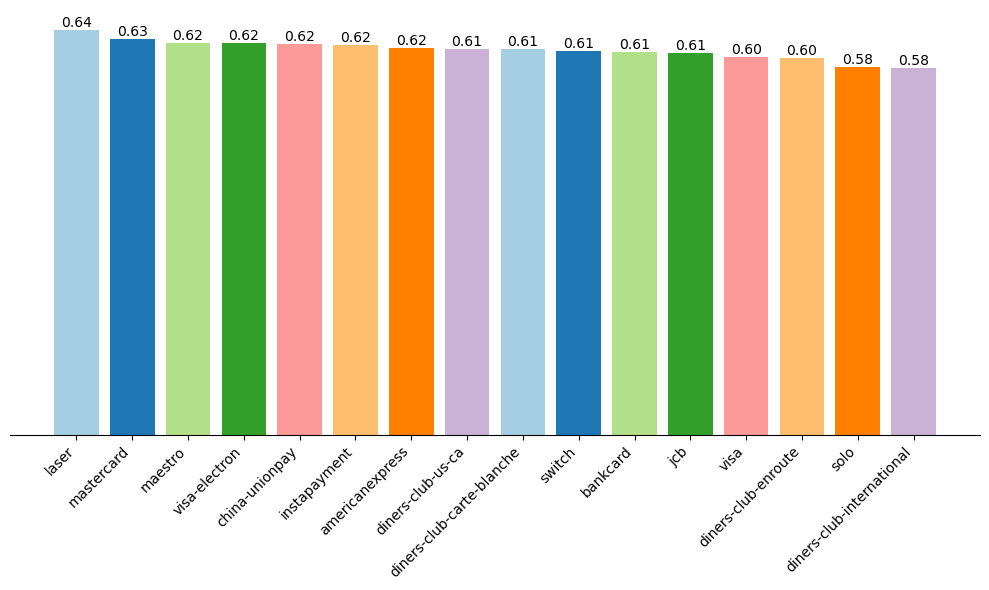

In [17]:
sql_query = '''SELECT
    ct.credit_card_type,
    AVG(ot.discount) AS average_discount
FROM
    customer_t ct
JOIN
    order_t ot ON ct.customer_id = ot.customer_id
GROUP BY
    ct.credit_card_type
ORDER BY
    average_discount DESC;'''
df_CcDiscount = pd.read_sql_query(sql_query, conn)
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

# Plot the bar chart
bars = ax.bar(df_CcDiscount['credit_card_type'], df_CcDiscount['average_discount'], color=colors)

# Add values inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Remove y-axis and y ticks
ax.spines['left'].set_visible(False)
plt.yticks([])

# Remove border connecting x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot
fig.savefig('Output/CCWiseDiscount.png', transparent=True)

C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1745073640.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_TransitTime = pd.read_sql_query(sql_query, conn)


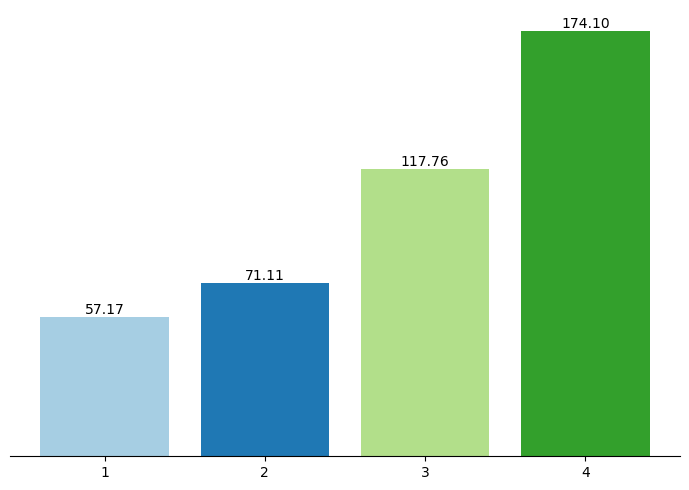

In [18]:
sql_query = '''SELECT
    quarter_number,
    AVG(DATEDIFF(ship_date, order_date)) AS average_ship_time
FROM
    order_t
GROUP BY
    quarter_number
ORDER BY quarter_number;'''

df_TransitTime = pd.read_sql_query(sql_query, conn)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111)

# Plot the bar chart
bars = ax.bar(df_TransitTime['quarter_number'], df_TransitTime['average_ship_time'], color=colors)

# Add values inside the bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}', ha='center', va='bottom')

# Remove y-axis and y ticks
ax.spines['left'].set_visible(False)
plt.yticks([])

# Remove border connecting x and y axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.xticks(range(1, 5))
# Rotate x-axis labels for better readability

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Display the plot
plt.show()

# Save the plot
fig.savefig('Output/TransitTime.png', transparent=True)

In [19]:
sql_query = '''
WITH RatingNumbers AS (
    SELECT
        o.product_id,
        CASE
            WHEN o.customer_feedback = 'Very Bad' THEN 1
            WHEN o.customer_feedback = 'Bad' THEN 2
            WHEN o.customer_feedback = 'Okay' THEN 3
            WHEN o.customer_feedback = 'Good' THEN 4
            WHEN o.customer_feedback = 'Very Good' THEN 5
            ELSE NULL  -- Handling any other values, if present
        END AS rating_number
    FROM
        order_t o
    JOIN
        product_t p ON o.product_id = p.product_id
	
    WHERE
        o.customer_feedback IN ('Very Bad', 'Bad', 'Okay', 'Good', 'Very Good')
)

 SELECT
        p.vehicle_maker, p.vehicle_color, p.vehicle_model, p.vehicle_model_year, c.gender, c.job_title, c.state, c.city, c.credit_card_type,
        o.quarter_number as QuarterNo , o.discount, o.quantity,o.ship_mode,o.shipping,o.vehicle_price as Price, o.quantity * o.vehicle_price AS Revenue,
        rn.rating_number Customers_Feedback,
        (DATEDIFF(o.ship_date, o.order_date)) AS ship_time
    FROM
        order_t o
    JOIN
        product_t p ON o.product_id = p.product_id 
	JOIN
		customer_t c ON c.customer_id = o.customer_id
    LEFT JOIN
        RatingNumbers rn ON o.product_id = rn.product_id
    
    '''

df = pd.read_sql_query(sql_query, conn)


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\1352567138.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


In [20]:

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform label encoder on 'vehicle_maker' column
df['VehicleMaker'] = label_encoder.fit_transform(df['vehicle_maker'])
df['VehicleColor'] = label_encoder.fit_transform(df['vehicle_color'])
df['VehicleModel'] = label_encoder.fit_transform(df['vehicle_model'])
df['Gender'] = label_encoder.fit_transform(df['gender'])
df['State'] = label_encoder.fit_transform(df['state'])
df['City'] = label_encoder.fit_transform(df['city'])
df['JobTitle'] = label_encoder.fit_transform(df['job_title'])
df['CreditCardType'] = label_encoder.fit_transform(df['credit_card_type'])
df['ShipMode'] = label_encoder.fit_transform(df['ship_mode'])
df['Shipping'] = label_encoder.fit_transform(df['shipping'])
# Display the encoded dataframe


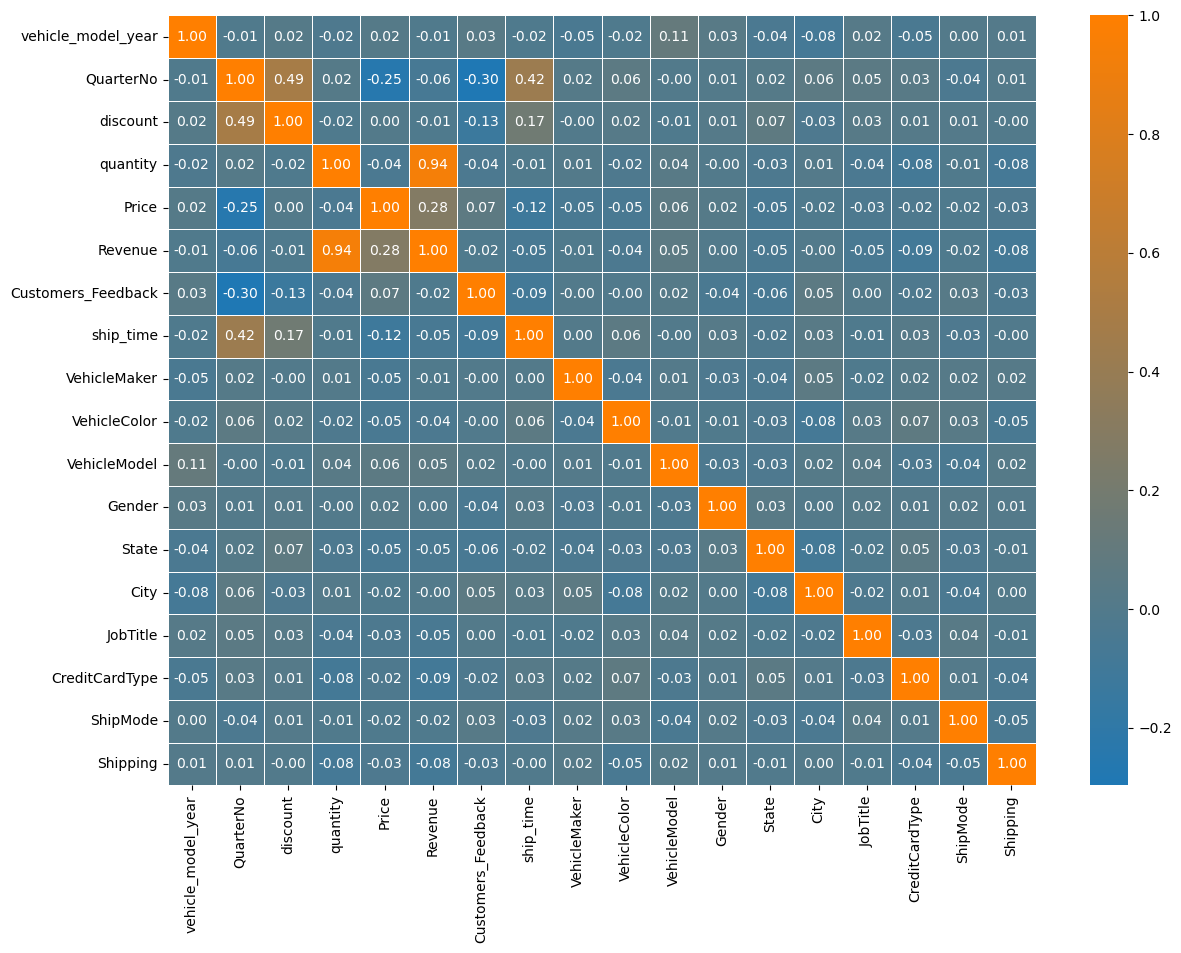

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
# Drop the 'shipper_id' and 'product_id' columns
df_numeric = df.select_dtypes(include='number')

# Create a heatmap
fig12 = plt.figure(figsize=(14, 10))
# Define the colors in RGB format
colors_rgb = {
    'positive': (31, 120, 180),  # Blue
    'negative': (255, 127, 0)     # Orange
}

# Normalize the RGB values to range [0, 1]
colors_normalized = {key: (r / 255, g / 255, b / 255) for key, (r, g, b) in colors_rgb.items()}

# Create the colormap using the specified colors
custom_cmap = mcolors.LinearSegmentedColormap.from_list("CustomColors", list(colors_normalized.values()))


# Now you can use custom_cmap a
sns.heatmap(df_numeric.corr(), annot=True, cmap=custom_cmap, fmt=".2f", linewidths=0.5)
# plt.title('Correlation Heatmap for Numeric Columns (excluding shipper_id and product_id)')
plt.show()
fig12.savefig('Output/heatmap.png', transparent=True)

In [22]:
df_numeric.corr()

,vehicle_model_year,QuarterNo,discount,quantity,Price,Revenue,Customers_Feedback,ship_time,VehicleMaker,VehicleColor,VehicleModel,Gender,State,City,JobTitle,CreditCardType,ShipMode,Shipping
vehicle_model_year,1.000000,-0.009849,0.019687,-0.023379,0.018664,-0.011828,0.033863,-0.016741,-0.047462,-0.017684,0.110619,0.034287,-0.038839,-0.076372,0.022574,-0.048472,0.004458,0.008756
QuarterNo,-0.009849,1.000000,0.487468,0.019259,-0.250861,-0.061720,-0.297083,0.423719,0.018628,0.055976,-0.000439,0.005071,0.020826,0.060620,0.048053,0.032332,-0.037481,0.007837
discount,0.019687,0.487468,1.000000,-0.015868,0.002883,-0.013816,-0.132713,0.173967,-0.001526,0.022716,-0.013732,0.014511,0.068746,-0.026094,0.028543,0.014748,0.010420,-0.000902
quantity,-0.023379,0.019259,-0.015868,1.000000,-0.040328,0.940632,-0.035689,-0.011794,0.006275,-0.021540,0.037174,-0.001953,-0.031401,0.007098,-0.039959,-0.080773,-0.010925,-0.077603
Price,0.018664,-0.250861,0.002883,-0.040328,1.000000,0.284140,0.066876,-0.118664,-0.050380,-0.049758,0.056838,0.019322,-0.053931,-0.017369,-0.032396,-0.022121,-0.015309,-0.025116
Revenue,-0.011828,-0.061720,-0.013816,0.940632,0.284140,1.000000,-0.015420,-0.054134,-0.010247,-0.035524,0.053513,0.001115,-0.047563,-0.002165,-0.052153,-0.085714,-0.016541,-0.081189
Customers_Feedback,0.033863,-0.297083,-0.132713,-0.035689,0.066876,-0.015420,1.000000,-0.087185,-0.001431,-0.004974,0.020502,-0.044549,-0.057460,0.054489,0.002639,-0.022928,0.028612,-0.028816
ship_time,-0.016741,0.423719,0.173967,-0.011794,-0.118664,-0.054134,-0.087185,1.000000,0.002653,0.057481,-0.000871,0.026871,-0.020183,0.034727,-0.014293,0.026112,-0.025479,-0.004687
VehicleMaker,-0.047462,0.018628,-0.001526,0.006275,-0.050380,-0.010247,-0.001431,0.002653,1.000000,-0.041405,0.010177,-0.027529,-0.035234,0.054100,-0.015937,0.021278,0.022293,0.022582
VehicleColor,-0.017684,0.055976,0.022716,-0.021540,-0.049758,-0.035524,-0.004974,0.057481,-0.041405,1.000000,-0.006984,-0.012021,-0.025034,-0.075446,0.028410,0.069789,0.033357,-0.052515


C:\Users\prash\AppData\Local\Temp\ipykernel_3848\158057656.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  dfsr = pd.read_sql_query(sql_query, conn)


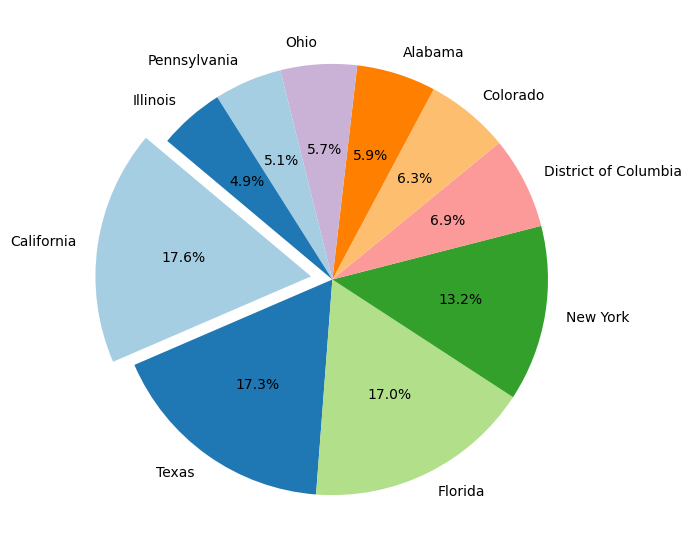

In [23]:
sql_query = '''SELECT
    customer_t.state,
    SUM(order_t.quantity * product_t.vehicle_price) AS total_revenue
FROM
    order_t
JOIN
    product_t ON order_t.product_id = product_t.product_id
JOIN
    customer_t ON order_t.customer_id = customer_t.customer_id
GROUP BY
    customer_t.state
ORDER BY
    total_revenue DESC
LIMIT 10;
'''

dfsr = pd.read_sql_query(sql_query, conn)

# Define the explode values to pull out slices
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # Pull out the first slice (10%) 
# Plot the customer distribution across top 10 states using a pie chart with exploded slice
fig1 =plt.figure(figsize=(7, 7))
plt.pie(dfsr['total_revenue'], labels=dfsr['state'], colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
#plt.title('Top 5 states with maximum customers')
fig1.savefig('Output/statewiseRevenue.png', transparent=True)